# Modeling & Evaluation

- [Topic Modeling](#topic_modeling)
- [Time Series Forecasting](#time_series_forecasting)

---

## Topic Modeling <a name="topic_modeling"></a>

### Modeling

#### A. Modeling

Der nachfolgende Code importiert für das Topic Modeling optimierte Klassen. Diese führen den Prozess der Erstellung eines LDA Topic Modeling durch. Es wird empfohlen die vordefinierten Klassen zur Berechnung der Modelle zu verwenden. Es besteht jedoch nachfolgend auch die Möglichkeit, die wichtigsten Schritte zur Berechnung des Models eigenständig Schritt für Schritt durchzuführen.

In [6]:
from src.models import topic_modeling as tm
from src.utils import safe_as_pkl
import pandas as pd

# load dataframe
df = pd.read_feather('../data/processed/twitter_tweets_processed.feather')

# create & build lda model
lda_model = tm.LdaModel(text=df['preprocessed_text'])
lda_model.build(num_topics=5)

# export
safe_as_pkl(lda_model, path='../models/lda_model.pkl')

2023-05-25 15:24:06,599 - INFO - Initialize model; create dictionary and corpus...
2023-05-25 15:24:40,090 - INFO - calculate lda model... (this can take a while)
2023-05-25 15:29:37,957 - INFO - Done. Model calculated successfully! Calculation time: 6.3369 minutes


#### 0. Datensatz laden

In [14]:
%%script false
import pandas as pd
# load dataframe
df = pd.read_feather('../data/processed/twitter_tweets_processed.feather')
df.head(4)

Couldn't find program: 'false'


#### 1. Erstellen eines Wörterbuchs

Ein Wörterbuch ist wichtig für das LDA-Modell, da es das Modell trainiert, die Sprache und den Kontext der Dokumente zu verstehen. Es enthält alle eindeutigen Wörter, die in den Dokumenten vorkommen, und ordnet jedem Wort eine eindeutige Nummer zu. Das Wörterbuch wird verwendet, um jedes Dokument in eine Vektordarstellung umzuwandeln, die das Modell verwenden kann.

In [15]:
%%script false
from gensim import corpora
dictionary = corpora.Dictionary(df['preprocessed_text'])

Couldn't find program: 'false'


#### 2. Erstellen eines Corpus

Ein Corpus ist notwendig, um jedes Dokument in eine Vektordarstellung umzuwandeln, die vom LDA-Modell verarbeitet werden kann. Ein Corpus ist eine Sammlung von Dokumenten, die in eine Matrix umgewandelt wird, wobei jede Zeile für ein Dokument und jede Spalte für ein Wort im Wörterbuch steht. Die Matrix enthält die Anzahl der Vorkommen jedes Wortes in jedem Dokument. Durch die Umwandlung jedes Dokuments in eine Vektordarstellung kann das LDA-Modell jedes Dokument analysieren und Themen identifizieren, die in jedem Dokument vorkommen. Ohne diese Vektordarstellung könnte das Modell die Dokumente nicht analysieren und Themen identifizieren.

In [16]:
%%script false
corpus = [dictionary.doc2bow(text) for text in df['preprocessed_text']]

Couldn't find program: 'false'


#### 3. Erstellen eines LDA-Modells

In [17]:
%%script false
from gensim import models
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=5)

Couldn't find program: 'false'


#### B. Ergebnisse visualisieren

In [7]:
import pyLDAvis.gensim_models
from src.utils import load_pkl

lda_model = load_pkl('../models/lda_model.pkl')

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model.model, lda_model.corpus, lda_model.dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.162041  0.144131       1        1  30.795186
4     -0.060638 -0.009188       2        1  23.105092
3     -0.164075  0.080613       3        1  22.246902
0      0.029021 -0.344181       4        1  16.752006
2      0.357732  0.128624       5        1   7.100814, topic_info=              Term           Freq          Total Category  logprob  loglift
53              ai   81781.000000   81781.000000  Default  30.0000  30.0000
853  cybersecurity   42737.000000   42737.000000  Default  29.0000  29.0000
95        technews   76808.000000   76808.000000  Default  28.0000  28.0000
50            tech  419510.000000  419510.000000  Default  27.0000  27.0000
34      innovation  215603.000000  215603.000000  Default  26.0000  26.0000
..             ...            ...            ...      ...      ...      ...
76            news    7455.672363   80244.791212   Topic5  -4.9087   0.2689
463       software    5893.605068   49293.767030   Topic5  -5.1438   0.5210
114            via    4424.798722   45740.486712   Topic5  -5.4305   0.3092
572        digital    4290.351266   40634.706645   Topic5  -5.4613   0.3967
19        business    4124.262475   78512.392155   Topic5  -5.5008  -0.3014

[321 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
2110      2  0.000256             --
2110      3  0.999609             --
868       2  0.978208  100daysofcode
868       4  0.021781  100daysofcode
235       2  0.999945             5g
...     ...       ...            ...
634       4  0.000596          would
1068      1  0.221831           year
1068      2  0.067301           year
1068      3  0.701461           year
1068      4  0.009400           year

[493 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 4, 1, 3])

### Evaluation

#### 1. Coherence Score berechnen

Der Coherence Score ist ein Evaluationsmaß für Topic Models, das versucht, die Kohärenz der gefundenen Themen zu bewerten. Die Kohärenz bezieht sich darauf, wie gut die Wörter innerhalb eines Themas zusammenpassen und ob sie eine sinnvolle Bedeutung ergeben. Ein hohes Maß an Kohärenz zeigt an, dass die Themen gut definiert und interpretierbar sind.

In [8]:
from src.models import topic_modeling as tm
from src.utils import load_pkl

lda_model = load_pkl('../models/lda_model.pkl')
coherence_score = tm.evaluate(model=lda_model.model, text=lda_model.text, dictionary=lda_model.dictionary)

2023-05-25 15:35:35,399 - INFO - calculate coherence score...
2023-05-25 15:36:17,480 - INFO - Done. Coherence score calculated successfully! Score: 0.31248594695596565


#### 2. Hyperparameter Tuning durchführen

Hyperparameter Tuning ist ein wichtiger Schritt im Machine Learning, der dazu beiträgt, das bestmögliche Modell zu finden. In diesem Fall wird das bestmögliche Modell anhand des Coherence Scores bemessen. Ziel des Hyperparameter Tuning ist es demnach, das Modell mit dem höchsten Coherence Score zu finden. Hyperparameter sind Parameter, die das Verhalten des Modells beeinflussen, aber nicht direkt von den Daten gelernt werden. Sie müssen vom Anwender festgelegt werden und können eine erhebliche Auswirkung auf die Leistung des Modells haben. Folgende Parameter sollen optimiert werden:

- num_topics
- alpha
- eta
- passes

**Random Search**

Um nun eine ausreichend gute Kombination dieser Werte zu ermitteln, wird zunächst ein Random-Search Algorithmus ausgeführt. Dieser wählt eine zufällige Kombination an Parametern aus und berechnet für diese den Coherence Score. Ziel des Algorithmus ist es, eine ausreichend gute Menge an Modellen berechnet zu haben, sodass anschließend eine Einschränkung der möglichen Paramenter-Kombinationen vorgenommen werden kann.

*Wertebereiche für Hyperparameter festlegen*

In [9]:
num_topics = [i for i in range(4, 74)]
alpha = ['symmetric', 'asymmetric'] + [round(i*0.1, 1) for i in range(1, 10)]
eta = ['symmetric', 'auto'] + [round(i*0.1, 1) for i in range(1, 10)]
passes = [i for i in range(1, 2)]

In [10]:
import itertools

combinations = list(itertools.product(num_topics, alpha, eta, passes))
list_parameter_combinations = [{'num_topics': item[0], 'alpha': item[1], 'eta': item[2], 'passes': item[3]} for item in combinations]

*Random Search Algorithmus ausführen*

Hinweis: Aufgrund einer möglichst langen Laufzeit des Random-Search Algorithmus wird empfohlen stattdessen das Skript hyperparameter_tuning_headless.py extern auf einem Server auszuführen.

In [1]:
%%script false
from src.models import hyperparameter_tuning as ht
import pandas as pd

df = ht.random_search('../data/processed/twitter_tweets_processed.feather', list_parameter_combinations, multicore=True)
df.to_feather('../data/modeling/ht_results_randomsearch.feather')

Couldn't find program: 'false'


*Ergebnisse laden und auswerten*

In [10]:
import pandas as pd
df = pd.read_feather('../data/modeling/ht_results_randomsearch.feather')
df.sort_values('coherence_score', ascending=False, inplace=True)
df = df.head(50)
df[['num_topics', 'eta', 'passes']] = df[['num_topics', 'eta', 'passes']].astype(float)
mean_values = df[['num_topics', 'eta', 'passes']].mean()
print(df)
print(mean_values)
# Todo: Von Top 50 Modellen den Mean von num_topics, aplha, eta & passes

            seed  num_topics       alpha  eta  passes     coherence_score
667   1686152042        11.0  asymmetric  0.5     9.0  0.5818809257163331
929   1686152042        17.0         0.1  0.7     9.0  0.5763077288087152
1068  1686152042        16.0         0.2  0.9     6.0  0.5703944180071809
941   1686152042        17.0   symmetric  0.9    10.0  0.5614698563855085
885   1686152042        12.0         0.3  0.9     9.0  0.5509165701548283
646   1686152042        19.0   symmetric  0.7    10.0  0.5418351303171569
758   1686152042        28.0         0.2  0.5    10.0   0.540073611959002
839   1686152042        20.0   symmetric  0.5    10.0  0.5331101082579478
1031  1686152042        14.0         0.4  0.9     6.0  0.5320846575571175
1142  1686152042        22.0         0.3  0.9     9.0  0.5315428790294124
830   1686152042        12.0         0.1  0.7    10.0  0.5308423229477817
947   1686152042        16.0         0.2  0.7     4.0  0.5301907611530463
672   1686152042        28.0  asymmetr

## **Grid Search**

Nachdem der Random-Search Algorithmus durchgeführt wurde, lassen sich die Wertebereiche der Hyperparameter weiter eingrenzen. Mithilfe des Grid-Search Algorithmus werden dann alle Kombinationen von Hyperparametern berechnet.

*Wertebereich für Hyperparameter einschränken*

In [22]:
num_topics = [i for i in range(13, 24)]
alpha = ['symmetric', 'asymmetric'] + [0.1, 0.2, 0.3]
eta = [0.5, 0.6, 0.7, 0.9]
passes = [i for i in range(10, 13)]

In [23]:
import itertools

combinations = list(itertools.product(num_topics, alpha, eta, passes))
list_parameter_combinations = [{'num_topics': item[0], 'alpha': item[1], 'eta': item[2], 'passes': item[3]} for item in combinations]

*Grid Search Algorithmus ausführen*

Hinweis: Da die Wahrscheinlichkeit einer langen Laufzeit hoch ist, wird auch an dieser Stelle empfohlen stattdessen das Skript hyperparameter_tuning_headless.py extern auf einem Server auszuführen.

In [2]:
%%script false
from src.models import hyperparameter_tuning as ht
import pandas as pd

df = ht.grid_search('../data/processed/twitter_tweets_processed.feather', list_parameter_combinations, multicore=True)
df.to_feather('../data/modeling/ht_results_gridsearch.feather')

Couldn't find program: 'false'


*Ergebnisse laden und auswerten*

In [4]:
import pandas as pd
df = pd.read_feather('../data/modeling/ht_results_gridsearch.feather')
df.sort_values('coherence_score', ascending=False, inplace=True)
df.head(10)

Couldn't find program: 'false'


#### 3. Erstellen optimiertes LDA-Modell 

Nach der Ausführung des Hyperparameter-Tunings, kann eine optimale Auswahl von Hyperparametern getroffen werden. Mithilfe der optimierten Parameter kann im folgenden das optimierte LDA-Modell erstellt und berechnet werden.

In [1]:
from src.models import topic_modeling as tm
from src.utils import safe_as_pkl
import pandas as pd

# load dataframe
df = pd.read_feather('../data/processed/twitter_tweets_processed.feather')

# create & build optimized lda model
lda_model = tm.LdaModel(text=df['preprocessed_text'])
lda_model.build(
    seed=1685346853, 
    num_topics=13, 
    alpha='asymmetric', 
    eta=0.3, 
    passes=1)

# export
safe_as_pkl(lda_model, path='../models/optimized_lda_model.pkl')

2023-05-29 10:56:25,850 - INFO - Initialize model; create dictionary and corpus...
2023-05-29 10:56:56,756 - INFO - calculate lda model... (this can take a while)
2023-05-29 11:05:01,912 - INFO - Done. Model calculated successfully! Calculation time: 70.8152 minutes


---

## Time Series Forecasting <a name="time_series_forecasting"></a>

### Modeling

#### 1. Vorbereitung

*Beiträge einem Topic zuweisen*

In [79]:
%%script false
from src.utils import load_pkl
import pandas as pd

lda_model = load_pkl('../models/optimized_lda_model.pkl')

# iterate over each document in the corpus and assign it the most likely topic
topic = []
for doc in lda_model.corpus:
    doc_topics = lda_model.model.get_document_topics(doc, minimum_probability=0.1)  # select minimum probability here!
    topic.append(max(doc_topics, key=lambda x: x[1])[0])
    
# load dataframe and add results 
df = pd.read_feather('../data/processed/twitter_tweets_processed.feather')
df['topic'] = topic
df.to_feather('../data/modeling/topic_assigned_twitter_tweets.feather')

Couldn't find program: 'false'


*Datensätze erstellen*

In [5]:
import pandas as pd

df = pd.read_feather('../data/modeling/topic_assigned_twitter_tweets.feather')

dict_tsf_data = {}

list_of_topics = df['topic'].unique().tolist()
for topic in list_of_topics:
    _ = df[df['topic'] == topic].groupby(df['date'].dt.date).size().reset_index(name='count')
    _['date'] = pd.to_datetime(_['date'])
    _ = _.set_index('date')
    dict_tsf_data[f'topic_{topic}'] = {'df': _}

#### 2. Data Exploration

topic_0


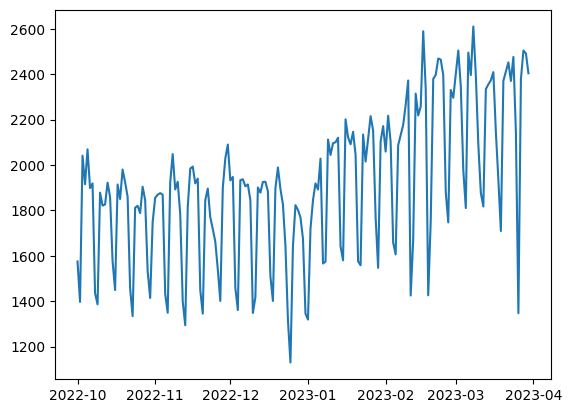

topic_3


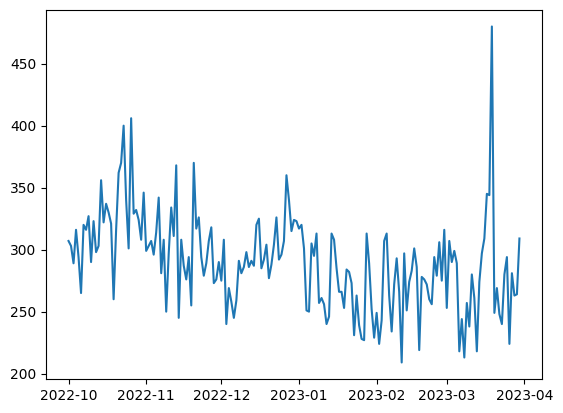

topic_1


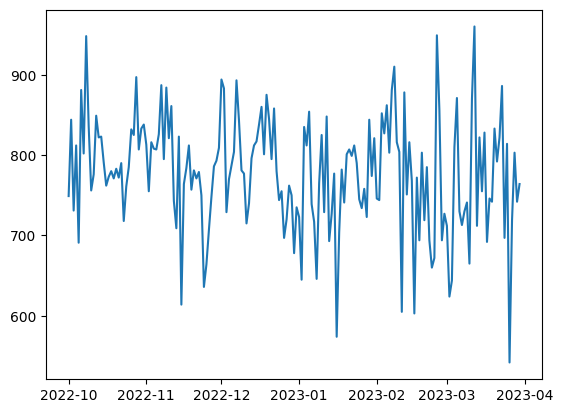

topic_4


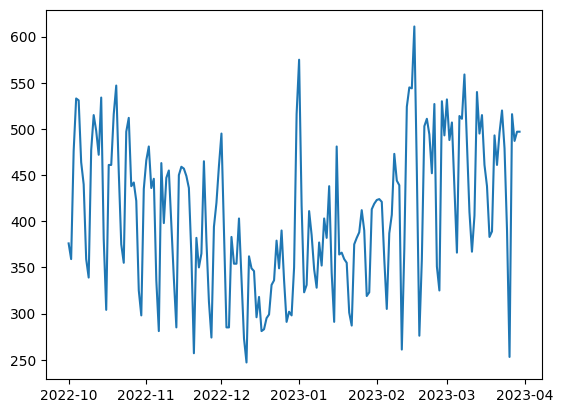

topic_2


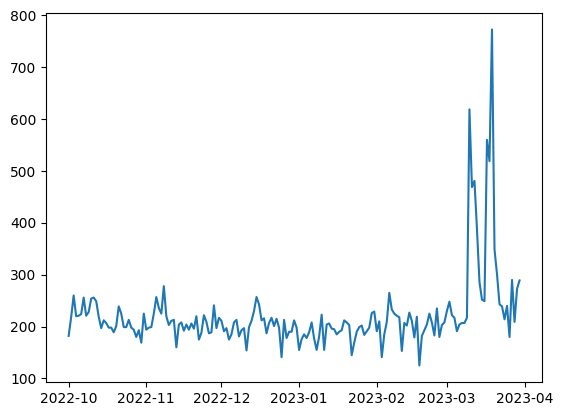

topic_10


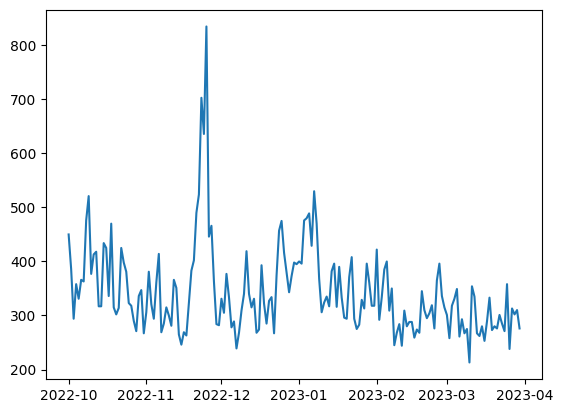

topic_5


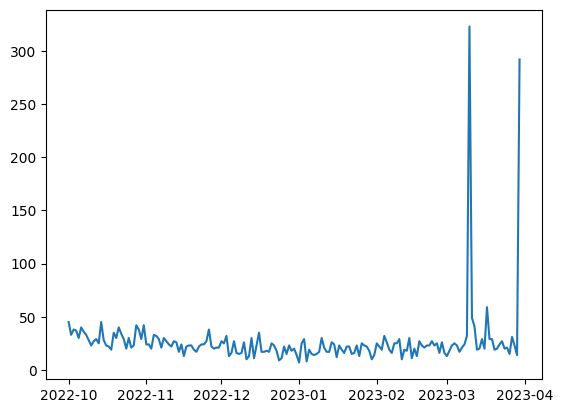

topic_11


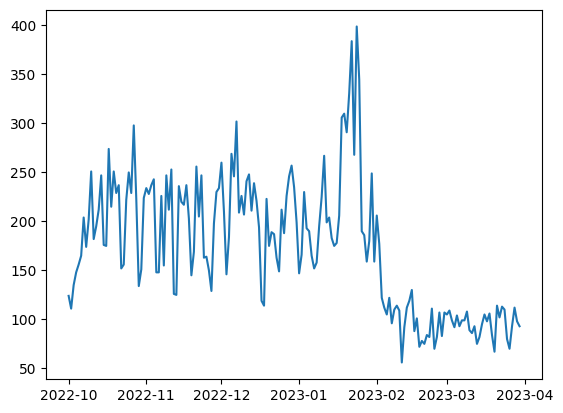

topic_6


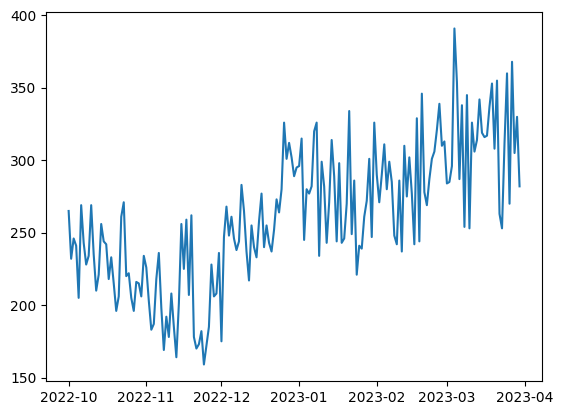

topic_12


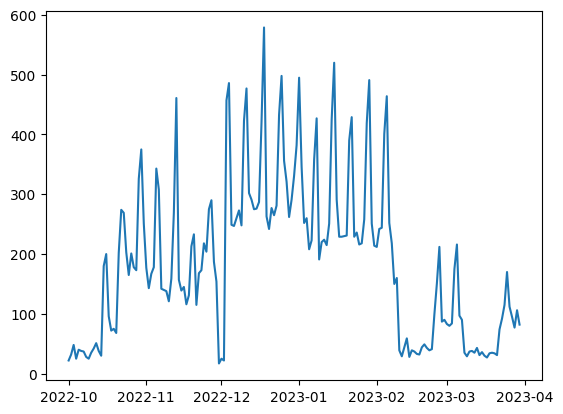

topic_8


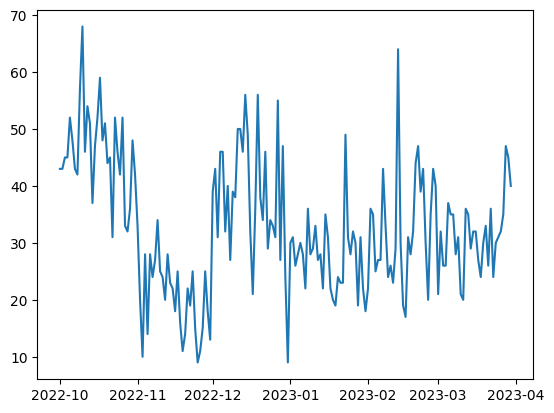

topic_7


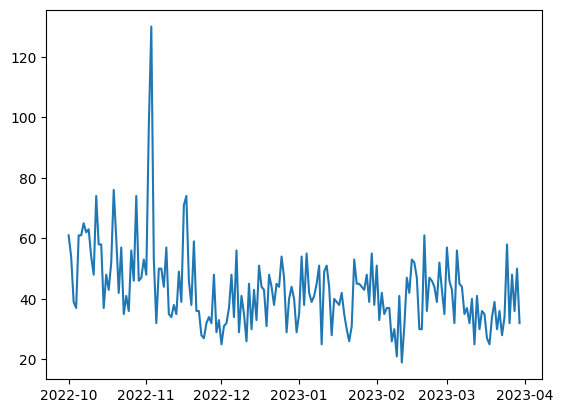

topic_9


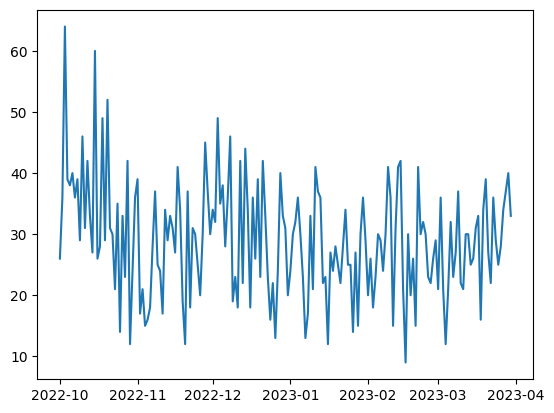

In [6]:
import matplotlib.pyplot as plt

for topic, data in dict_tsf_data.items():
    print(topic)
    plt.plot(data['df'])
    plt.show()

#### 3. ARIMA-Modell

*Erstellung von Trainings-Trainings- und Testdatensätzen*

Der Trainingsdatensatz wird verwendet, um das ARIMA-Modell zu trainieren. Indem das Modell auf den Trainingsdaten angepasst wird, erlernt es die Muster, Trends und Abhängigkeiten in den Daten.  Der Testdatensatz wird später verwendet, um die Vorhersageleistung des Modells zu bewerten. Da der Testdatensatz Daten enthält, die das Modell während des Trainings nicht gesehen hat, ermöglicht er eine unabhängige Bewertung der Modellgenauigkeit.

In [7]:
for topic, data in dict_tsf_data.items():
    split = int(0.9 * len(data['df']))
    df_train, df_test = data['df'][:split], data['df'][split:]
    dict_tsf_data[topic].update({'df_train': df_train, 'df_test': df_test})

*Überprüfe auf Stationary-Time-Series*

In Bezug auf Zeitreihenmodelle bedeutet "stationary" oder "stationär", dass die statistischen Eigenschaften einer Zeitreihe über die Zeit hinweg konstant bleiben. Das bedeutet, dass sich der Mittelwert, die Varianz und die Autokorrelation der Daten nicht systematisch mit der Zeit ändern. ARIMA-Modelle basieren auf der Annahme, dass die Zeitreihenstationär sind.

Um zu überprüfen, ob die Zeitreihen stationär sind, wird der Augmented Dickey-Fuller (ADF) Test durchgeführt. Dieser statistische Test wird häufig verwendet, um die Stationarität von Zeitreihendaten zu überprüfen. Der ADF-Test testet die Nullhypothese, dass die Zeitreihe eine Einheitswurzel (nicht stationär) hat. Wenn der p-Wert des Tests unter einem bestimmten Signifikanzniveau liegt (z. B. 0,05), kann die Nullhypothese verworfen werden und auf Stationarität geschlossen werden.

In [8]:
from statsmodels.tsa.stattools import adfuller

stationary_topics = []
for topic, data in dict_tsf_data.items():
    adf_test_result = adfuller(data['df_train']['count'])
    if adf_test_result[1] <= 0.05:
        stationary_topics.append(topic)
    print(f'{topic}: p-value: {adf_test_result[1]}; stationary: {True if adf_test_result[1] <= 0.05 else False}')

topic_0: p-value: 0.9359545836732026; stationary: False
topic_3: p-value: 0.4720746148369308; stationary: False
topic_1: p-value: 1.570683011030922e-16; stationary: True
topic_4: p-value: 0.40906408055040544; stationary: False
topic_2: p-value: 3.240381299459429e-07; stationary: True
topic_10: p-value: 0.00528727122621543; stationary: True
topic_5: p-value: 6.398791599067166e-20; stationary: True
topic_11: p-value: 0.5494399112380967; stationary: False
topic_6: p-value: 0.7012731705914742; stationary: False
topic_12: p-value: 0.44690621578631423; stationary: False
topic_8: p-value: 0.24828777587094153; stationary: False
topic_7: p-value: 2.0220815866174966e-13; stationary: True
topic_9: p-value: 1.0229485869860054e-19; stationary: True


In [9]:
# sort out non-stationary topics
filtered_dict_tsf_data = {key: value for key, value in dict_tsf_data.items() if key in stationary_topics}

*Berechne ARIMA-Modelle*

In [10]:
from pmdarima import auto_arima

for topic, data in filtered_dict_tsf_data.items():
    df_train = data['df_train']
    arima_model = auto_arima(df_train['count'], seasonal=False)
    filtered_dict_tsf_data[topic].update({'model': arima_model})
    print(f'{topic}: {arima_model}')

topic_1:  ARIMA(2,1,1)(0,0,0)[0]          
topic_2:  ARIMA(1,0,0)(0,0,0)[0] intercept
topic_10:  ARIMA(2,0,0)(0,0,0)[0] intercept
topic_5:  ARIMA(1,0,0)(0,0,0)[0] intercept
topic_7:  ARIMA(1,1,1)(0,0,0)[0]          
topic_9:  ARIMA(0,1,1)(0,0,0)[0]          


In [11]:
from src.utils import safe_as_pkl
safe_as_pkl(filtered_dict_tsf_data, '../models/arima_models.pkl')

### Evaluation

In [12]:
from src.utils import load_pkl
arima_models = load_pkl('../models/arima_models.pkl')

topic_1


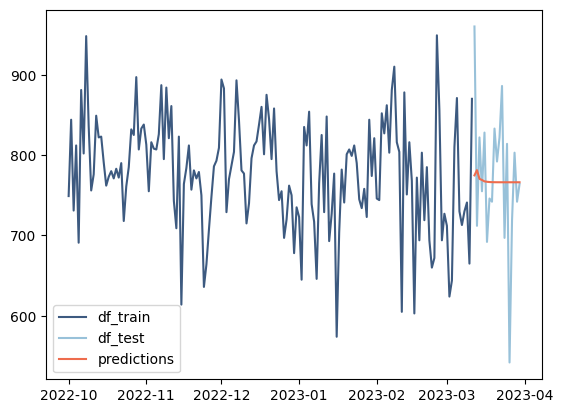

Average value of the dependent variable (AVG): 772.1579
Mean Absolute Error (MAE): 64.2143
Mean Absolute Percentage Error (MAPE): 0.0867
Root Mean Squared Error (RMSE): 84.7118




topic_2


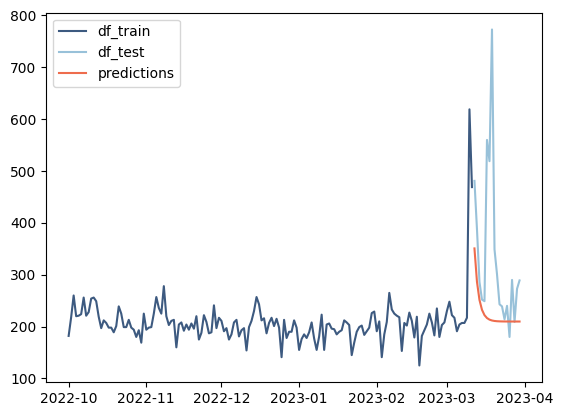

Average value of the dependent variable (AVG): 333.4211
Mean Absolute Error (MAE): 110.6077
Mean Absolute Percentage Error (MAPE): 0.2536
Root Mean Squared Error (RMSE): 178.2577




topic_10


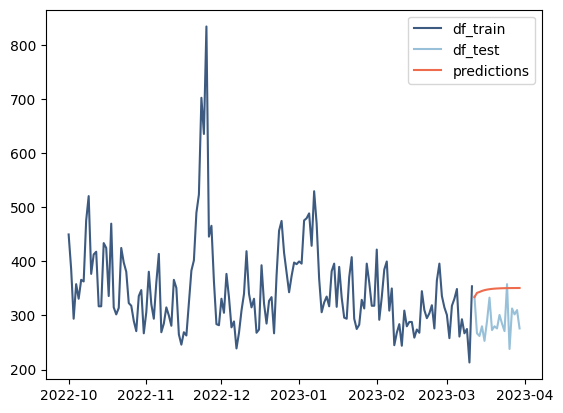

Average value of the dependent variable (AVG): 289.5789
Mean Absolute Error (MAE): 59.3463
Mean Absolute Percentage Error (MAPE): 0.2164
Root Mean Squared Error (RMSE): 65.716




topic_5


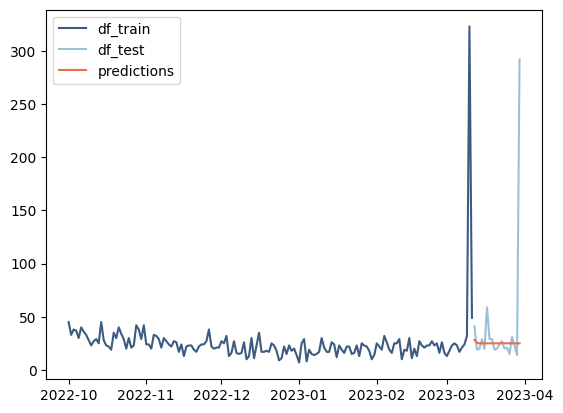

Average value of the dependent variable (AVG): 39.5789
Mean Absolute Error (MAE): 20.7539
Mean Absolute Percentage Error (MAPE): 0.3115
Root Mean Squared Error (RMSE): 62.0301




topic_7


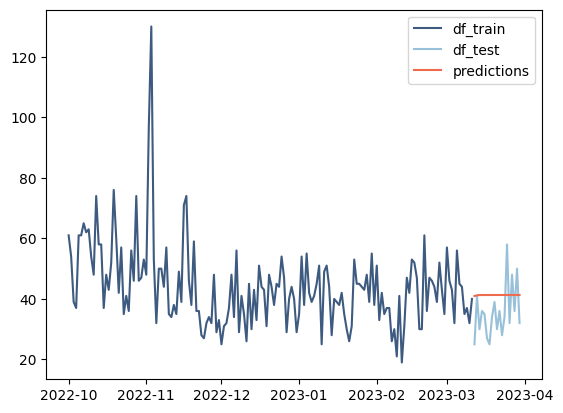

Average value of the dependent variable (AVG): 35.5789
Mean Absolute Error (MAE): 9.0682
Mean Absolute Percentage Error (MAPE): 0.2811
Root Mean Squared Error (RMSE): 10.1631




topic_9


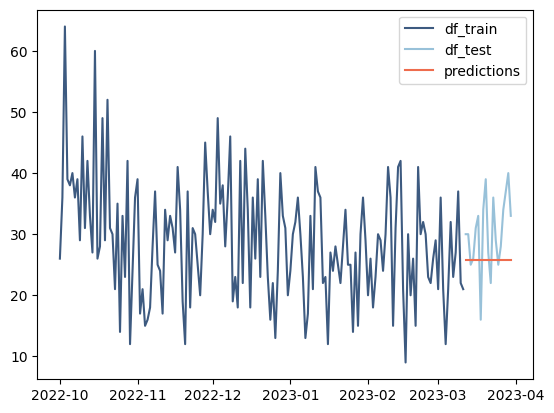

Average value of the dependent variable (AVG): 30.2632
Mean Absolute Error (MAE): 6.122
Mean Absolute Percentage Error (MAPE): 0.1981
Root Mean Squared Error (RMSE): 7.4395






In [16]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

for topic, data in arima_models.items():
    model = data['model']
    predictions = data['model'].predict(n_periods=len(data['df_test']))
    
    #plot
    plt.plot(data['df_train'], label='df_train', color='#3d5a80')
    plt.plot(data['df_test'], label='df_test', color='#98c1d9')
    plt.plot(predictions, label='predictions', color='#ee6c4d')
    plt.legend()
    
    #
    avg = data['df_test']['count'].mean()
    mae = mean_absolute_error(data['df_test'], predictions)
    mape = mean_absolute_percentage_error(data['df_test'], predictions)
    rmse = mean_squared_error(data['df_test'], predictions, squared=False)
    
    #show
    print(topic)
    plt.show()
    print(f'Average value of the dependent variable (AVG): {round(avg, 4)}')
    print(f'Mean Absolute Error (MAE): {round(mae, 4)}')
    print(f'Mean Absolute Percentage Error (MAPE): {round(mape, 4)}')
    print(f'Root Mean Squared Error (RMSE): {round(rmse, 4)}')
    print('\n\n\n')

---